# 1. 필요한 라이브러리 import

In [25]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 2. 데이터 불러오기

In [4]:
df = pd.read_csv('./train.csv')

* Survived : 0 = 사망, 1 = 생존
* Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
* Sex : male = 남성, female = 여성
* Age : 나이
* SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
* Parch : 타이타닉 호에 동승한 부모 / 자식의 수
* Ticket : 티켓 번호
* Fare : 승객 요금
* Cabin : 방 호수
* Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

# 3. 데이터 확인하기

### 3-1. 데이터 전체적으로 살펴보기

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43bb7a8090>,
      dtype=object)

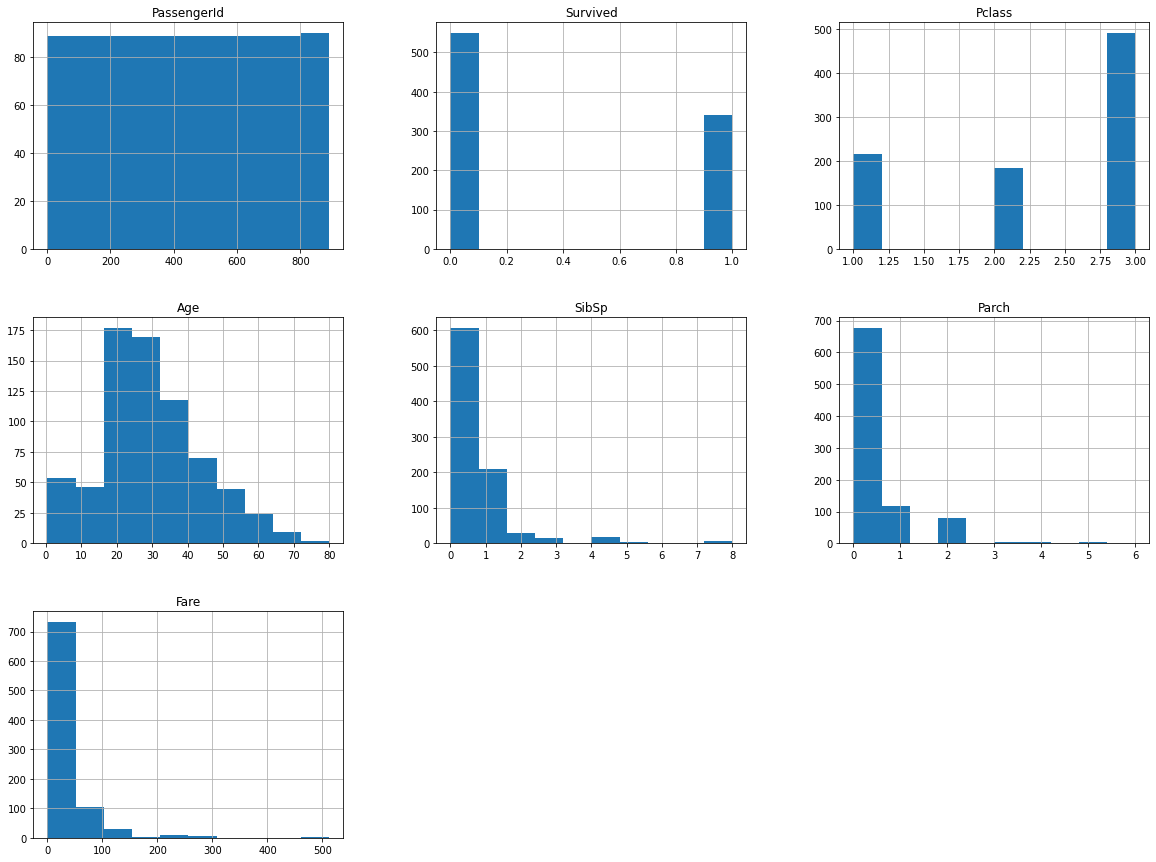

In [7]:
df.hist(figsize=(20,15))
# PassengerId는 사람별 number이므로 무시

### 3-2. 그래프로 변수 특성 확인하기

0    549
1    342
Name: Survived, dtype: int64


([<matplotlib.axis.XTick at 0x7f43bb2bbf90>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

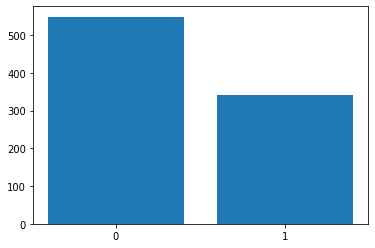

In [8]:
print(df['Survived'].value_counts()) # 0 = 사망, 1 = 생존

value_counts = df['Survived'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

In [9]:
corr_matrix = df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Text(0, 0.5, 'Count')

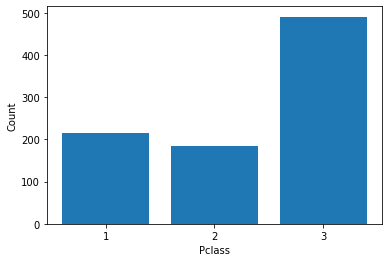

In [10]:
# 'Survived'와 상관관계가 가장 높은 'Pclass' 에 대해 시각화
value_counts = df['Pclass'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.xlabel('Pclass')
plt.ylabel('Count')

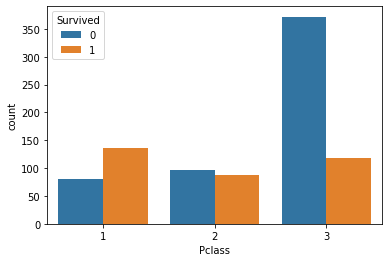

In [11]:
# 연속형 변수가 아니여서 상관관계 그래프가 아닌 count 그래프로 나타냄
# Pclass 마다 'Survived'를 count
sns.countplot(data=df, x="Pclass", hue="Survived")

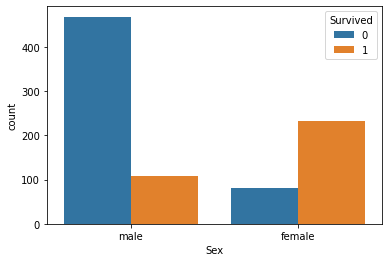

In [12]:
# 성별에 따른 생존 countplot
sns.countplot(data=df, x="Sex", hue="Survived")

# 4. 처리할 데이터 확인 및 전처리

### 4-1. 결측값 처리

In [13]:
# 결측값 확인해보기
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* 결측값이 존재 컬럼: 'Age', 'Cabin', 'Embarked'
  - 'Age'에서는 중간값으로 대체
  - 'Cabin'에서는 컬럼 자체를 제거(결측치가 굉장히 많음)
  - 'Embarked'에서는 결측치를 가진 행 제거(결측치 2개)

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
df.drop('Cabin', axis=1, inplace=True) # inplace : 해당 열을 삭제한 데이터프레임으로 df 대체

In [16]:
 # 위에서 모든 결측치를 처리한 후이므로 Embarked의 결측치에 해당하는 열을 한번에 지움
 df = df.dropna()

In [17]:
# 결측치가 잘 처리되었는지 확인
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4-2. 컬럼 추출
 - target 변수인 'Survived'와 상관관계가 높은 컬럼을 추출

In [23]:
# 'Survived'와 상관관계 조사
# 숫자형 컬럼들만 가져와서 상관관계 조사
corr_matrix = df.corr()

# target 변수로 사용할 'Survived' 컬럼과의 상관관계
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.255290
Parch          0.083151
PassengerId   -0.005028
SibSp         -0.034040
Age           -0.069822
Pclass        -0.335549
Name: Survived, dtype: float64

In [24]:
# 'Survived'와 상관관계가 높은 숫자형 변수와 범주형 변수를 추출함
features = ['Fare', 'Pclass', 'Sex', 'Embarked']
target = ['Survived']

### 4-3. 범주형 변수 처리 및 스케일링
* 아래 내용을 ColumnTransformer를 이용하여 수행
1. 범주형 변수 처리
 * 범주형 변수 : 'Sex', 'Embarked'
 * 'Name'과 'Ticket'컬럼은 target 변수와 상관관계가 낮다고 판단하여 따로 처리X
 * 원 핫 인코딩 방식 사용
2. 스케일링
 * 수치형 변수 : 'Fare', 'Pclass'
 * 3-1에서 Fare의 스케일이 다른 변수들보다 큼을 확인했음.
 * MinMaxScaler를 사용 할 경우 일부 max값에 치우칠 수 있음
 * 그러므로 0~1 사이로 스케일링 해주는 StandardScaler를 사용함

In [28]:
cat_features = ['Sex', 'Embarked']
num_features = ['Fare', 'Pclass']

ct = ColumnTransformer([
    ('encoding', OneHotEncoder(), cat_features),
    ('scaling', StandardScaler(), num_features)
])

pp_data = ct.fit_transform(df)
pp_data

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.50023975,  0.82520863],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.78894661, -1.57221121],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.48664993,  0.82520863],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.17408416,  0.82520863],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
        -0.0422126 , -1.57221121],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.49017322,  0.82520863]])